<a href="https://colab.research.google.com/github/ShaunakNandi/EIP4.0/blob/master/wk3/Assignment_6_cifar10v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

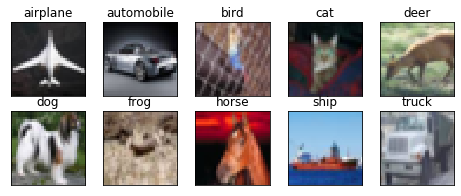

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 24s 61ms/step - loss: 1.8826 - acc: 0.2708 - val_loss: 1.5181 - val_acc: 0.4363
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 1.3978 - acc: 0.4852 - val_loss: 1.1686 - val_acc: 0.5840
Epoch 3/50
390/390 [==============================] - 20s 53ms/step - loss: 1.1358 - acc: 0.5985 - val_loss: 1.0043 - val_acc: 0.6481
Epoch 4/50
390/390 [==============================] - 20s 53ms/step - loss: 0.9786 - acc: 0.6577 - val_loss: 0.8255 - val_acc: 0.7122
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8672 - acc: 0.7001 - val_loss: 0.7780 - val_acc: 0.7283
Epoch 6/50
390/390 [==============================] - 21s 53ms/step - loss: 0.8001 - acc: 0.7250 - val_loss: 0.7016 - val_acc: 0.7586
Epoch 7/50
390/390 [==============================] - 20s 53ms/step - loss: 0.7490 - acc: 0.7426 - val_loss: 0.7566 - val_acc: 0.7510
Epoch 8/50
390/390 [==============================] - 

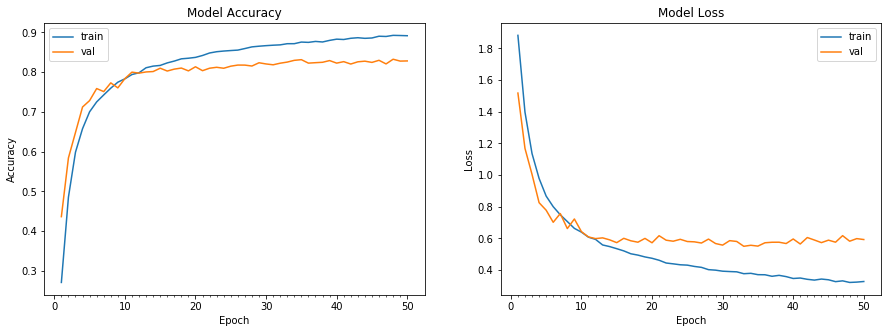

Accuracy on test data is: 82.81


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# My model

In [0]:
from keras.layers import Conv2D, SeparableConv2D, GlobalAveragePooling2D
from keras.models import Input 
nb_classes=10
channels = 3
input = Input(shape=(None, None, channels), name='input_mod2')
#32,32,3

model = Sequential()

#RF: 3x3
layer0 = SeparableConv2D(16, 3, use_bias=False, name='conv_0')(input)
layer0 = Activation('relu', name='act0')(layer0)
layer0 = Dropout(0.025, name='drop0')(layer0)
layer0 = BatchNormalization(name='bn0')(layer0)
#30,30,16

#RF: 5x5
layer1 = SeparableConv2D(32, 3, use_bias=False, name='conv_1')(layer0)
layer1 = Activation('relu', name='act1')(layer1)
layer1  = Dropout(0.025, name='drop1')(layer1)
layer1  = BatchNormalization(name='bn1')(layer1)
28,28,16*32

#RF: 7x7
layer2= SeparableConv2D(32, 3, use_bias=False, name='conv_2')(layer1)
layer2  = Activation('relu', name='act2')(layer2)
layer2  = Dropout(0.025, name='drop2')(layer2)
layer2  = BatchNormalization(name='bn2')(layer2)
26,26,16*32*32

#RF: 9x9
layer3 = SeparableConv2D(64, 3, use_bias=False, name='conv_3')(layer2)
layer3  = Activation('relu', name='act3')(layer3)
layer3  = Dropout(0.025, name='drop3')(layer3)
layer3  = BatchNormalization(name='bn3')(layer3)
#24,24,16*32*32*64

#RF: 11x11
layer4 = SeparableConv2D(128, 3, use_bias=False, name='conv_5')(layer3)
layer4  = Activation('relu', name='act5')(layer4)
layer4  = Dropout(0.025, name='drop5')(layer4)
layer4  = BatchNormalization(name='bn5')(layer4)
#22,22,16*32*32*64*128

#RF: 22x22
layer5 = Conv2D(16, (1, 1), use_bias=False, name='trans1')(layer4)
layer5 = MaxPooling2D(pool_size=(2,2), strides=(1,1), name='MP1')(layer5)
#11,11,16

#RF: 24x24
layer6 = SeparableConv2D(16, 3, use_bias=False, name='conv_6')(layer5)
layer6  = Activation('relu', name='act6')(layer6)
layer6  = Dropout(0.025, name='drop6')(layer6)
layer6  = BatchNormalization(name='bn6')(layer6)
#9,9,16*16

#RF: 26x26
layer7 = SeparableConv2D(32, 3, use_bias=False, name='conv_7')(layer6)
layer7  = Activation('relu', name='act7')(layer7)
layer7  = Dropout(0.025, name='drop7')(layer7)
layer7  = BatchNormalization(name='bn7')(layer7)
#7,7,256*32

#RF: 28x28
layer8 = SeparableConv2D(32, 3, use_bias=False, name='conv_8')(layer7)
layer8  = Activation('relu', name='act8')(layer8)
layer8  = Dropout(0.025, name='drop8')(layer8)
layer8  = BatchNormalization(name='bn8')(layer8)
#5,5,256*32*32

#RF: 30x30
layer9 = SeparableConv2D(64, 3, use_bias=False, name='conv_9')(layer8)
layer9  = Activation('relu', name='act9')(layer9)
layer9  = Dropout(0.025, name='drop9')(layer9)
layer9  = BatchNormalization(name='bn9')(layer9)
#3,3,256*32*32*64

#RF: 32x32
layer10 = SeparableConv2D(128, 3, use_bias=False, name='conv_10')(layer9)
layer10  = Activation('relu', name='act10')(layer10)
layer10  = Dropout(0.025, name='drop10')(layer10)
layer10  = BatchNormalization(name='bn10')(layer10)
#1,1,256*32*32*64*128

#remove dense
layer11 = SeparableConv2D(nb_classes, (1,1), name='trans3')(layer10)
layer11 = GlobalAveragePooling2D(data_format='channels_last', name='output')(layer11)
output = Activation('softmax', name='softmax')(layer11)
#one-hot-vector

In [10]:
from keras.models import Model 

model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_mod2 (InputLayer)      (None, None, None, 3)     0         
_________________________________________________________________
conv_0 (SeparableConv2D)     (None, None, None, 16)    75        
_________________________________________________________________
act0 (Activation)            (None, None, None, 16)    0         
_________________________________________________________________
drop0 (Dropout)              (None, None, None, 16)    0         
_________________________________________________________________
bn0 (BatchNormalization)     (None, None, None, 16)    64        
_________________________________________________________________
conv_1 (SeparableConv2D)     (None, None, None, 32)    656       
_________________________________________________________________
act1 (Activation)            (None, None, None, 32)    0   

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=(array([[[..., verbose=1, steps_per_epoch=781)`




Epoch 1/50
781/781 [==============================] - 67s 86ms/step - loss: 2.2718 - acc: 0.1469 - val_loss: 2.1870 - val_acc: 0.1829
Epoch 2/50
781/781 [==============================] - 62s 80ms/step - loss: 2.0832 - acc: 0.2177 - val_loss: 1.9384 - val_acc: 0.2543
Epoch 3/50
781/781 [==============================] - 62s 79ms/step - loss: 1.9198 - acc: 0.2690 - val_loss: 1.7965 - val_acc: 0.3161
Epoch 4/50
781/781 [==============================] - 62s 79ms/step - loss: 1.8367 - acc: 0.3034 - val_loss: 1.7478 - val_acc: 0.3503
Epoch 5/50
781/781 [==============================] - 62s 80ms/step - loss: 1.7727 - acc: 0.3310 - val_loss: 1.6484 - val_acc: 0.3957
Epoch 6/50
781/781 [==============================] - 62s 80ms/step - loss: 1.7160 - acc: 0.3614 - val_loss: 1.5667 - val_acc: 0.4260
Epoch 7/50
781/781 [==============================] - 62s 79ms/step - loss: 1.6725 - acc: 0.3789 - val_loss: 1.5859 - val_acc: 0.4284
Epoch 8/50
781/781 [==============================] - 62s 80

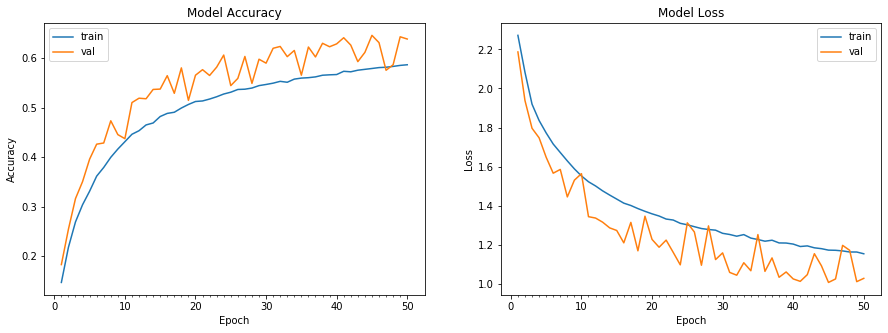

AttributeError: ignored

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=False,
                             zoom_range=0.2,                      # 3. 20% random zoom
                             rotation_range=10,                   # 5. random rotate by 10 deg
                             width_shift_range=0.2,               # 6. remove 20% of img along X axis (possibly remove ROI)
                             height_shift_range=0.2               # 7. remove 20% of img along Y axis (possibly remove ROI)
                             #fill_mode='nearest
                             )                        

# train the model
start = time.time()
# Train the model
#print(train_features.shape, ' ', test_features)
#model.fit(train_features, train_labels, batch_size=64, nb_epoch=1, validation_data = (test_features, test_labels), verbose=1)
model = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))